In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#データの作成

In [0]:
data = np.array( [[1.0, 2.0, 4.0], [-1.0, 1.0, 2.0], [3.0, 0.0, 1.0], [-2.0, -2.0, -1.0]] )

##データのplot

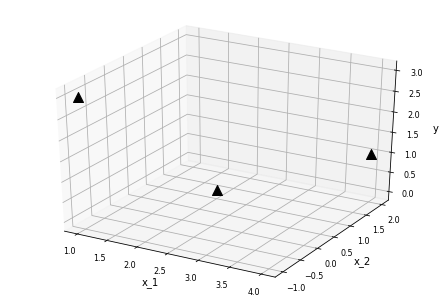

In [10]:
data_dim = [list(x_) for x_ in data]
#print (type(data_dim[0][0]))
ax = Axes3D(plt.figure())
ax.tick_params(labelsize = 8)
ax.set_xlabel ('x_1')
ax.set_ylabel ('x_2')
ax.set_zlabel ('y')
ax.scatter (data_dim[0], data_dim[1], data_dim[2], s=100, c='k', marker='^', depthshade=False)

#重回帰

##モデルの定義

In [0]:
W = np.zeros((len(data), len(data_dim)))

###パラメータの更新

In [0]:
#準備
X = np.zeros((len(data), len(data[0])))
#Xの1列目に'1'を置く
X[:, 0] = np.ones(len(data))
#Xにデータのx_1とx_2をそのまま代入
X[:,1:] = data[:,0:2]

Y = data[: , 2]

#(Eq. 1.49)
item_1 = np.linalg.inv( np.dot(X.T, X) )
item_2 = np.dot(item_1, X.T)
W = np.dot( item_2, Y)

##plot

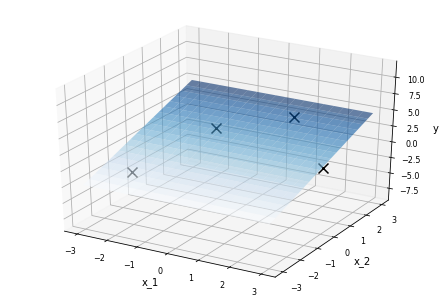

In [9]:
data_dim = [list(x_) for x_ in zip(*data)]
#data
ax = Axes3D(plt.figure())
ax.tick_params(labelsize = 8)
ax.set_xlabel ('x_1')
ax.set_ylabel ('x_2')
ax.set_zlabel ('y')
ax.set_zlim (int(min(data_dim[2]))-8, int(max(data_dim[2])+8))
ax.scatter (data_dim[0], data_dim[1], data_dim[2], s=100, c='k', marker='x', depthshade=False)

#準備(あってもなくてもいい)
min_x1, min_x2, max_x1, max_x2 = min(data_dim[0]), min(data_dim[1]), max(data_dim[0]), max(data_dim[1])                                                                          
if min_x1 <= min_x2:
  min_x = min_x1
else:
  min_x = min_x2
if max_x1 <= max_x2: 
  max_x = max_x1
else: 
  max_x = max_x2

#面
x_1 = np.linspace(int(min_x)-1, int(max_x)+1, 20)
x_2 = np.linspace(int(min_x)-1, int(max_x)+1, 20)
x1, x2 = np.meshgrid(x_1, x_2)


y = W[0] + W[1]*x1 + W[2]*x2
ax.plot_surface (x1,x2,y,cmap='Blues',alpha=0.6)